In [271]:
import os
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import astropy.units as u
from astropy import constants as const

############################
# Custom scripts
import get_ZdepSFRD as Z_SFRD
import paths
import init_values as In

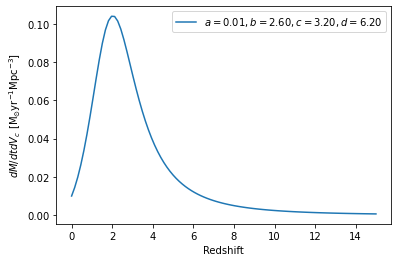

In [13]:
# plot SFRD(z)

redshift_list  = np.linspace(0,15, num=100)
y_vals = Z_SFRD.Madau_Dickinson2014(redshift_list, a=0.01, b=2.6, c=3.2,  d=6.2) #test with M&F 2017 vals
plt.plot(redshift_list, y_vals,label = '$a=%.2f, b=%.2f, c=%.2f, d=%.2f$'% (0.01, 2.6, 3.2,  6.2))
plt.xlabel("Redshift")
plt.ylabel(r'$dM/dt dV_c$ $\mathrm{[M_{\odot} yr^{-1} Mpc^{-3}]}$')
plt.legend();

In [314]:
fit_param_filename = 'test_best_fit_parameters_TNG100.txt'
mu0_best, muz_best, omega0_best, omegaz_best, alpha0_best,sf_a_best, sf_b_best, sf_c_best, sf_d_best = np.loadtxt(str(paths.data)+'/'+fit_param_filename,unpack=True, delimiter=',')

In [315]:
mu0 = mu0_best
muz = muz_best
omega0 = omega0_best
omegaz = omegaz_best
alpha = alpha0_best

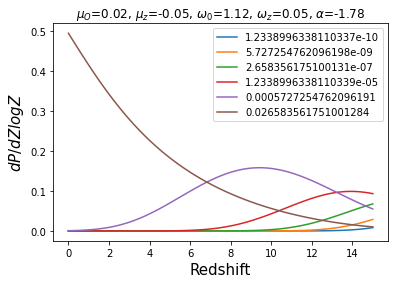

In [316]:
metal_bins = np.logspace(-10, 0, 61) #60 bins
center_Zbin = (metal_bins[:-1] + metal_bins[1:])/2

dPdlogZ, metallicities, step_logZ, p_draw_metallicity = Z_SFRD.skew_metallicity_distribution(redshift_list, mu_z =muz, 
                                                        mu_0 =mu0, omega_0=omega0,omega_z=omegaz, alpha =alpha, metals=center_Zbin)

indices = np.arange(0, 60, 10)
for i in indices:
    plt.plot(redshift_list, dPdlogZ[:,i], label=metallicities[i])
plt.xlabel("Redshift", size=15)
plt.ylabel(r"$dP/dZlogZ$", size=15)
plt.title(label=r'$\mu_O$=%.2f, $\mu_z$=%.2f, $\omega_0$=%.2f, $\omega_z$=%.2f, $\alpha$=%.2f'%(mu0, muz, omega0, omegaz, alpha))
plt.legend();

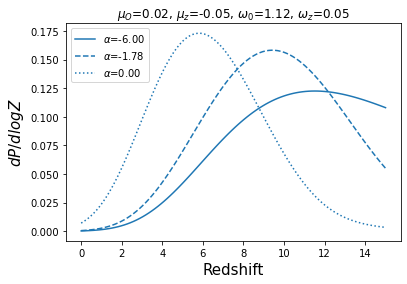

In [317]:
dPdlogZ1, metallicities1, step_logZ1, p_draw_metallicity1 = Z_SFRD.skew_metallicity_distribution(redshift_list, mu_z =muz, 
                                                        mu_0 =mu0, omega_0=omega0,omega_z=omegaz, alpha =-6, metals=center_Zbin)
dPdlogZ2, metallicities2, step_logZ2, p_draw_metallicity2 = Z_SFRD.skew_metallicity_distribution(redshift_list, mu_z =muz, 
                                                        mu_0 =mu0, omega_0=omega0,omega_z=omegaz, alpha =0, metals=center_Zbin)

indices = np.arange(0, 60, 10)
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']
for j, i in enumerate(indices[4:5]):
    if j==0:
        plt.plot(redshift_list, dPdlogZ1[:,i], c=colors[j], ls='-', label=r'$\alpha$=%.2f'%-6)
    else:
        plt.plot(redshift_list, dPdlogZ1[:,i], c=colors[j], ls='-')
for j, i in enumerate(indices[4:5]):
    if j==0:
        plt.plot(redshift_list, dPdlogZ[:,i], c=colors[j], ls='--', label=r'$\alpha$=%.2f'%alpha)
    else:
        plt.plot(redshift_list, dPdlogZ[:,i], c=colors[j], ls='--')
for j, i in enumerate(indices[4:5]):
    if j==0:
        plt.plot(redshift_list, dPdlogZ2[:,i], c=colors[j], ls=':', label=r'$\alpha$=%.2f'%0)
    else:
        plt.plot(redshift_list, dPdlogZ2[:,i], c=colors[j], ls=':')
plt.xlabel("Redshift", size=15)
plt.ylabel(r"$dP/dlogZ$", size=15)
plt.title(label=r'$\mu_O$=%.2f, $\mu_z$=%.2f, $\omega_0$=%.2f, $\omega_z$=%.2f'%(mu0, muz, omega0, omegaz))
plt.legend();

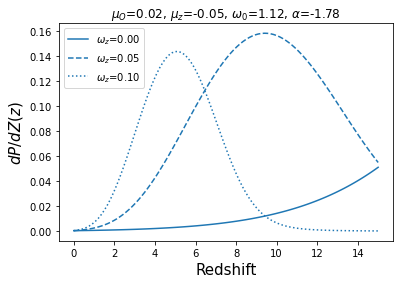

In [318]:
dPdlogZ3, metallicities3, step_logZ3, p_draw_metallicity3 = Z_SFRD.skew_metallicity_distribution(redshift_list, mu_z =muz, 
                                                        mu_0 =mu0, omega_0=omega0,omega_z=0, alpha =alpha, metals=center_Zbin)
dPdlogZ4, metallicities2, step_logZ4, p_draw_metallicity4 = Z_SFRD.skew_metallicity_distribution(redshift_list, mu_z =muz, 
                                                        mu_0 =mu0, omega_0=omega0,omega_z=0.1, alpha =alpha, metals=center_Zbin)

indices = np.arange(0, 60, 10)
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']
for j, i in enumerate(indices[4:5]):
    if j==0:
        plt.plot(redshift_list, dPdlogZ3[:,i], c=colors[j], ls='-', label=r'$\omega_z$=%.2f'%0)
    else:
        plt.plot(redshift_list, dPdlogZ3[:,i], c=colors[j], ls='-')
for j, i in enumerate(indices[4:5]):
    if j==0:
        plt.plot(redshift_list, dPdlogZ[:,i], c=colors[j], ls='--', label=r'$\omega_z$=%.2f'%omegaz)
    else:
        plt.plot(redshift_list, dPdlogZ[:,i], c=colors[j], ls='--')
for j, i in enumerate(indices[4:5]):
    if j==0:
        plt.plot(redshift_list, dPdlogZ4[:,i], c=colors[j], ls=':', label=r'$\omega_z$=%.2f'%0.1)
    else:
        plt.plot(redshift_list, dPdlogZ4[:,i], c=colors[j], ls=':')
plt.xlabel("Redshift", size=15)
plt.ylabel(r"$dP/dZ(z)$", size=15)
plt.title(label=r'$\mu_O$=%.2f, $\mu_z$=%.2f, $\omega_0$=%.2f, $\alpha$=%.2f'%(mu0, muz, omega0, alpha))
plt.legend();

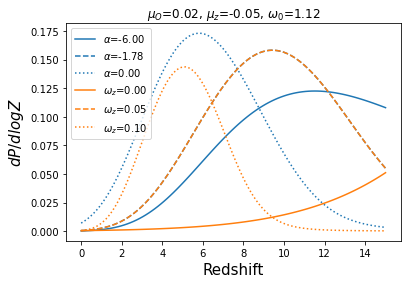

In [319]:
for j, i in enumerate(indices[4:5]):
    if j==0:
        plt.plot(redshift_list, dPdlogZ1[:,i], c='tab:blue', ls='-', label=r'$\alpha$=%.2f'%-6)
    else:
        plt.plot(redshift_list, dPdlogZ1[:,i], c='tab:blue', ls='-')
for j, i in enumerate(indices[4:5]):
    if j==0:
        plt.plot(redshift_list, dPdlogZ[:,i], c='tab:blue', ls='--', label=r'$\alpha$=%.2f'%alpha)
    else:
        plt.plot(redshift_list, dPdlogZ[:,i], c='tab:blue', ls='--')
for j, i in enumerate(indices[4:5]):
    if j==0:
        plt.plot(redshift_list, dPdlogZ2[:,i], c='tab:blue', ls=':', label=r'$\alpha$=%.2f'%0)
    else:
        plt.plot(redshift_list, dPdlogZ2[:,i], c='tab:blue', ls=':')
for j, i in enumerate(indices[4:5]):
    if j==0:
        plt.plot(redshift_list, dPdlogZ3[:,i], c='tab:orange', ls='-', label=r'$\omega_z$=%.2f'%0)
    else:
        plt.plot(redshift_list, dPdlogZ3[:,i], c='tab:orange', ls='-')
for j, i in enumerate(indices[4:5]):
    if j==0:
        plt.plot(redshift_list, dPdlogZ[:,i], c='tab:orange', ls='--', label=r'$\omega_z$=%.2f'%omegaz)
    else:
        plt.plot(redshift_list, dPdlogZ[:,i], c=colors[j], ls='--')
for j, i in enumerate(indices[4:5]):
    if j==0:
        plt.plot(redshift_list, dPdlogZ4[:,i], c='tab:orange', ls=':', label=r'$\omega_z$=%.2f'%0.1)
    else:
        plt.plot(redshift_list, dPdlogZ4[:,i], c='tab:orange', ls=':')
plt.xlabel("Redshift", size=15)
plt.ylabel(r"$dP/dlogZ$", size=15)
plt.title(label=r'$\mu_O$=%.2f, $\mu_z$=%.2f, $\omega_0$=%.2f'%(mu0, muz, omega0))
plt.legend();
plt.savefig('dPdlogZ_comparison.png', bbox_inches='tight')

In [ ]:
#low -> high resolution = skewness (alpha) increases (less negative, less skewed)
#low -> high resolution = redshift evolution of variance (omega_z) increases

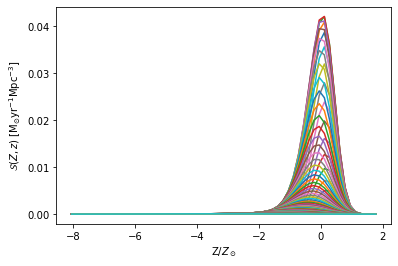

In [173]:
dPdlogZ, metallicities, step_logZ, p_draw_metallicity = Z_SFRD.skew_metallicity_distribution(redshift_list, mu_z =muz_best, 
                                                        mu_0 =mu0_best, omega_0=omega0_best,omega_z=omegaz_best, alpha =alpha0_best, metals=center_Zbin)
sfr = Z_SFRD.Madau_Dickinson2014(redshift_list, a=0.01, b=2.6, c=3.2,  d=6.2)
model_SFRD = (sfr* dPdlogZ.T).value

Zsun = 0.014
shift_step=0
plt.plot(np.log10(metallicities/Zsun), model_SFRD) 
plt.xlabel(r"Z/$Z_\odot$")
plt.ylabel(r"$ \mathcal{S}(Z,z) \ \mathrm{[M_{\odot} yr^{-1} Mpc^{-3}]}$");